In [7]:
import graphviz as gv

In [8]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             simplepath=True,
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  path = enumerate(path) if simplepath else path
  for v, u in path:
    if u != -1:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [9]:
import math

def bellmanFord(G, s): # returns the path p and and whether or not a negative cycle exists
    n = len(G)                      # |V|
    p = [-1]*n                      # path
    g = [math.inf]*n                # cost
    g[s] = 0

    for _ in range(n-1):            # repetir |V| - 1 veces
        for u in range(n):
            for v, w in G[u]:       # para cada borde (u, v, con peso w) de E
                f = g[u] + w
                if f < g[v]:        # relax(u, v, w)
                    g[v] = f
                    p[v] = u


    for u in range(n):              # para cada borde (u, v, con peso w) de E
        for v, w in G[u]:
            f = g[u] + w
            if f < g[v]:            # se puede relajar?
                return None         # existe ciclo negativo

    return p                        # no existe ciclo negativo

In [10]:
%%file a1.al
3 3 4 9
0 9 2 2 6 4
1 4 5 6
-
6 8
1 1 3 9
5 3 7 1
6 3

Overwriting a1.al


M -> 0 \\
N -> 1 \\
O -> 2 \\
P -> 3 \\
Q -> 4 \\
R -> 5 \\

In [16]:
%%file a2.al
1 1
2 3 3 2 4 2
3 2
5 2
3 -3
-

Writing a2.al


In [17]:
with open("a2.al") as f:
  G = []
  for line in f:
    if line == '-\n':
      G.append([])
    else:
      nums = [int(x) for x in line.split()]
      G.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

  for x in G:
    print(x)

[(1, 1)]
[(2, 3), (3, 2), (4, 2)]
[(3, 2)]
[(5, 2)]
[(3, -3)]
[]


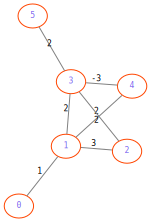

In [18]:
adjlShow(G, weighted=True, layout="neato")

In [19]:
path = bellmanFord(G, 0)
print(path)

[-1, 0, 1, 4, 1, 3]


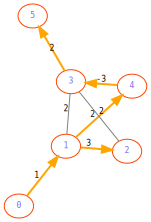

In [20]:
adjlShow(G, weighted=True, path = path, layout="neato")